<a href="https://colab.research.google.com/github/DeokHanLee/Data-Analysys-Programming/blob/main/202210116_%EC%9D%B4%EB%8D%95%ED%95%9C_%EB%8D%B0%EC%9D%B4%ED%84%B0%EB%B6%84%EC%84%9D_%ED%94%84%EB%A1%9C%EC%A0%9D%ED%8A%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

plt.rc('font', family='NanumBarunGothic')

df1 = pd.read_csv('/content/한국도로공사_적재불량 단속실적_20230531.csv', encoding='CP949')
df1


,구분,상세구분,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023-05
0,수도권,적재불량 고발실적,20167,19390,32833,42395,37583,41167,43257,32027,31183,32736,32948,28704,43566,23191,9185
1,강원,적재불량 고발실적,1490,2150,1686,2820,2956,3417,3657,3502,3711,4140,3886,2646,5699,3708,1222
2,충북,적재불량 고발실적,0,0,0,0,0,0,0,0,2925,4449,4168,4631,6358,3700,1071
3,대전충남,적재불량 고발실적,5961,4809,5553,7895,7329,9918,9985,8393,7032,6474,7106,4916,7882,8259,3489
4,전북,적재불량 고발실적,0,0,0,2693,3687,4164,4252,3022,3223,3301,3436,2426,3672,3971,2166
5,광주전남,적재불량 고발실적,4823,4049,3941,4877,5238,5370,5369,4458,5416,5724,5727,3909,13645,13620,4314
6,대구경북,적재불량 고발실적,7845,5915,7682,9730,11047,10956,10420,7591,7650,7401,7530,4025,6074,5672,6101
7,부산경남,적재불량 고발실적,8425,14651,14105,16660,15687,18585,19551,13127,14501,14307,15551,14588,28680,30075,14457


In [ ]:
#충북본부 17년도 신설 , 전북본부 12년도 신설로 인한 0값 대체(해당지역 평균 값)
target_row_2017_to_2023 = df1[(df1['구분'] == '충북')].loc[:, '2017':'2023-05']
target_row_2012_to_2023 = df1[(df1['구분'] == '전북')].loc[:, '2012':'2023-05']

mean_values_2017_to_2023 = round(target_row_2017_to_2023.mean(axis=1).iloc[0])
mean_values_2012_to_2023 = round(target_row_2012_to_2023.mean(axis=1).iloc[0])

df1.loc[2] = df1.loc[2].replace(0, int(mean_values_2017_to_2023))
df1.loc[4] = df1.loc[4].replace(0, int(mean_values_2012_to_2023))
df1



,구분,상세구분,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023-05
0,수도권,적재불량 고발실적,20167,19390,32833,42395,37583,41167,43257,32027,31183,32736,32948,28704,43566,23191,9185
1,강원,적재불량 고발실적,1490,2150,1686,2820,2956,3417,3657,3502,3711,4140,3886,2646,5699,3708,1222
2,충북,적재불량 고발실적,3900,3900,3900,3900,3900,3900,3900,3900,2925,4449,4168,4631,6358,3700,1071
3,대전충남,적재불량 고발실적,5961,4809,5553,7895,7329,9918,9985,8393,7032,6474,7106,4916,7882,8259,3489
4,전북,적재불량 고발실적,3334,3334,3334,2693,3687,4164,4252,3022,3223,3301,3436,2426,3672,3971,2166
5,광주전남,적재불량 고발실적,4823,4049,3941,4877,5238,5370,5369,4458,5416,5724,5727,3909,13645,13620,4314
6,대구경북,적재불량 고발실적,7845,5915,7682,9730,11047,10956,10420,7591,7650,7401,7530,4025,6074,5672,6101
7,부산경남,적재불량 고발실적,8425,14651,14105,16660,15687,18585,19551,13127,14501,14307,15551,14588,28680,30075,14457


In [ ]:
#전반적인 정보
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 17 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   구분       8 non-null      object
 1   상세구분     8 non-null      object
 2   2009     8 non-null      int64 
 3   2010     8 non-null      int64 
 4   2011     8 non-null      int64 
 5   2012     8 non-null      int64 
 6   2013     8 non-null      int64 
 7   2014     8 non-null      int64 
 8   2015     8 non-null      int64 
 9   2016     8 non-null      int64 
 10  2017     8 non-null      int64 
 11  2018     8 non-null      int64 
 12  2019     8 non-null      int64 
 13  2020     8 non-null      int64 
 14  2021     8 non-null      int64 
 15  2022     8 non-null      int64 
 16  2023-05  8 non-null      int64 
dtypes: int64(15), object(2)
memory usage: 1.2+ KB


In [ ]:
#원 핫 인코딩
df1_dum = pd.get_dummies(df1)
df1_dum

,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,...,2023-05,구분_강원,구분_광주전남,구분_대구경북,구분_대전충남,구분_부산경남,구분_수도권,구분_전북,구분_충북,상세구분_적재불량 고발실적
0,20167,19390,32833,42395,37583,41167,43257,32027,31183,32736,...,9185,0,0,0,0,0,1,0,0,1
1,1490,2150,1686,2820,2956,3417,3657,3502,3711,4140,...,1222,1,0,0,0,0,0,0,0,1
2,3900,3900,3900,3900,3900,3900,3900,3900,2925,4449,...,1071,0,0,0,0,0,0,0,1,1
3,5961,4809,5553,7895,7329,9918,9985,8393,7032,6474,...,3489,0,0,0,1,0,0,0,0,1
4,3334,3334,3334,2693,3687,4164,4252,3022,3223,3301,...,2166,0,0,0,0,0,0,1,0,1
5,4823,4049,3941,4877,5238,5370,5369,4458,5416,5724,...,4314,0,1,0,0,0,0,0,0,1
6,7845,5915,7682,9730,11047,10956,10420,7591,7650,7401,...,6101,0,0,1,0,0,0,0,0,1
7,8425,14651,14105,16660,15687,18585,19551,13127,14501,14307,...,14457,0,0,0,0,1,0,0,0,1


In [ ]:
#데이터 요약
df1.describe()

,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023-05
count,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.00000,8.000000
mean,6993.125000,7274.750000,9129.250000,11371.250000,10928.375000,12184.625000,12548.875000,9502.500000,9455.125000,9816.500000,10044.000000,8230.625000,14447.000000,11524.50000,5250.625000
std,5798.308459,6241.613385,10314.759436,13371.893313,11611.926233,12783.168442,13508.629405,9711.648308,9543.006676,9875.713515,10032.965649,9139.902874,14254.844079,10063.44498,4600.533663
min,1490.000000,2150.000000,1686.000000,2693.000000,2956.000000,3417.000000,3657.000000,3022.000000,2925.000000,3301.000000,3436.000000,2426.000000,3672.000000,3700.00000,1071.000000
25%,3758.500000,3758.500000,3758.500000,3630.000000,3846.750000,4098.000000,4164.000000,3800.500000,3589.000000,4371.750000,4097.500000,3593.250000,5980.250000,3905.25000,1930.000000
50%,5392.000000,4429.000000,4747.000000,6386.000000,6283.500000,7644.000000,7677.000000,6024.500000,6224.000000,6099.000000,6416.500000,4328.000000,7120.000000,6965.50000,3901.500000
75%,7990.000000,8099.000000,9287.750000,11462.500000,12207.000000,12863.250000,12702.750000,9576.500000,9362.750000,9127.500000,9535.250000,7334.000000,17403.750000,16012.75000,6872.000000
max,20167.000000,19390.000000,32833.000000,42395.000000,37583.000000,41167.000000,43257.000000,32027.000000,31183.000000,32736.000000,32948.000000,28704.000000,43566.000000,30075.00000,14457.000000


<ipython-input-78-5bb87564d763>:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data = df1, ci= None)


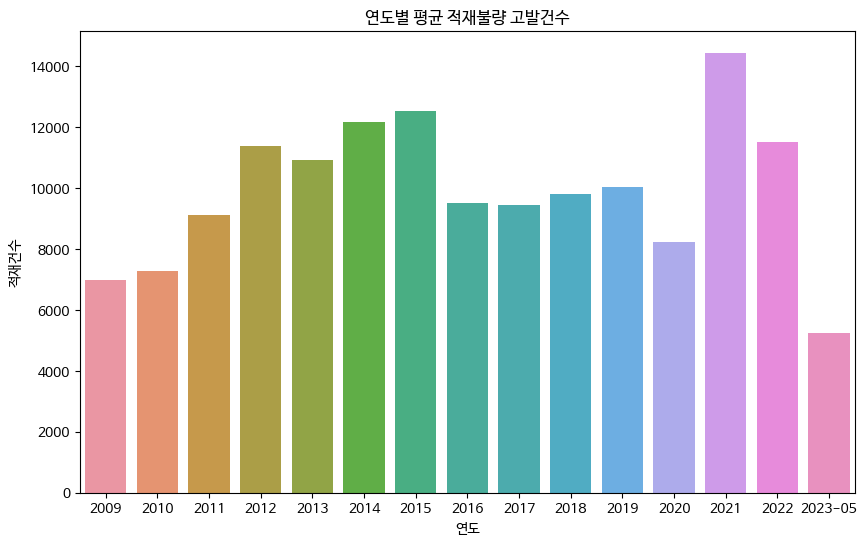

In [ ]:
# 연도별 평균 적재불량 고발건수
plt.figure(figsize=(10, 6))
sns.barplot(data = df1, ci= None)
plt.xlabel('연도')
plt.ylabel('적재건수')
plt.title('연도별 평균 적재불량 고발건수')

plt.show()


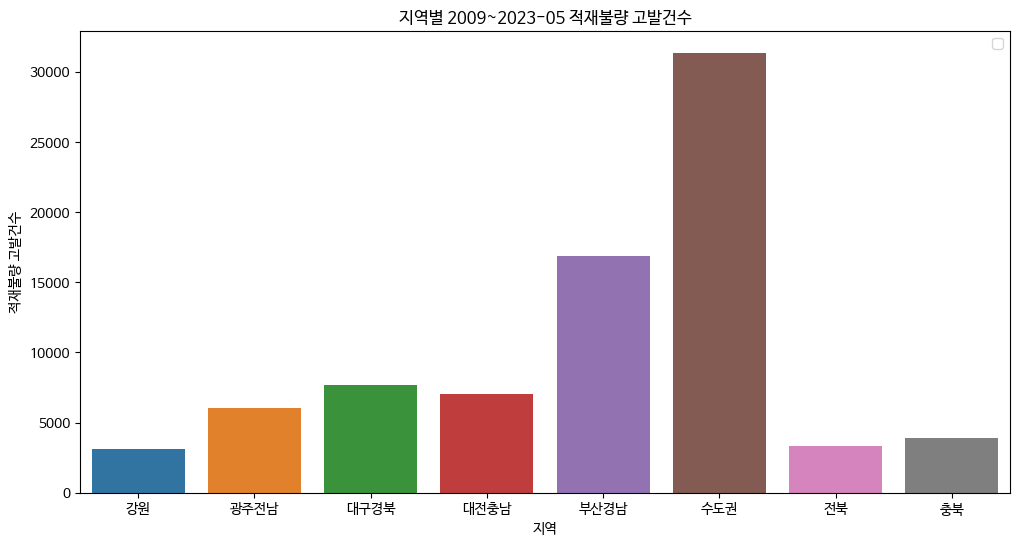

In [ ]:
#지역별 2009년 부터 2023년 5월까지의 적재불량 고발건수
sum_reports_by_region = df1.groupby('구분')[['2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021', '2022', '2023-05']].sum().reset_index()

sum_reports_by_region['평균 적재불량 고발건수'] = sum_reports_by_region.iloc[:, 1:].mean(axis=1)
sum_reports_by_region = sum_reports_by_region.sort_values('구분')

plt.figure(figsize=(12, 6))
sns.barplot(x='구분', y='평균 적재불량 고발건수', data=sum_reports_by_region)
plt.xlabel('지역')
plt.ylabel('적재불량 고발건수')
plt.title('지역별 2009~2023-05 적재불량 고발건수')
plt.legend()
plt.show()


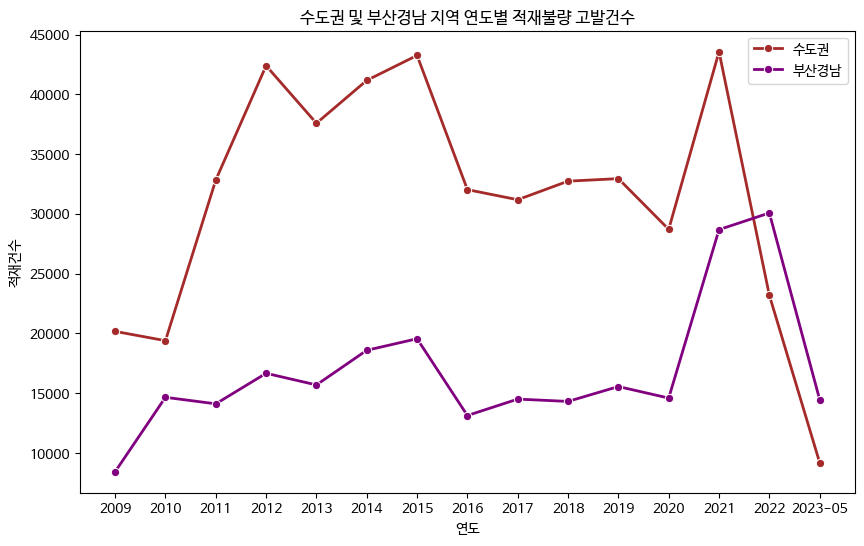

In [ ]:
#수도권 지역과 부산경남 지역의 연도별 적재불량 고발건수
capital_data = df1[df1['구분'] == '수도권']
yearly_data_capital = capital_data.loc[:, '2009':'2023-05']
busan_gyeongnam_data = df1[df1['구분'] == '부산경남']
yearly_data_busan_gyeongnam = busan_gyeongnam_data.loc[:, '2009':'2023-05']

plt.figure(figsize=(10, 6))

sns.lineplot(x=yearly_data_capital.columns, y=yearly_data_capital.sum(), color='brown', label='수도권', linewidth=2 , marker='o')

sns.lineplot(x=yearly_data_busan_gyeongnam.columns, y=yearly_data_busan_gyeongnam.sum(), color='purple', label='부산경남', linewidth=2, marker='o')

plt.xlabel('연도')
plt.ylabel('적재건수')
plt.title('수도권 및 부산경남 지역 연도별 적재불량 고발건수')
plt.legend()

plt.show()


T-statistic: 4.900422231294765
P-value: 3.641283181927746e-05


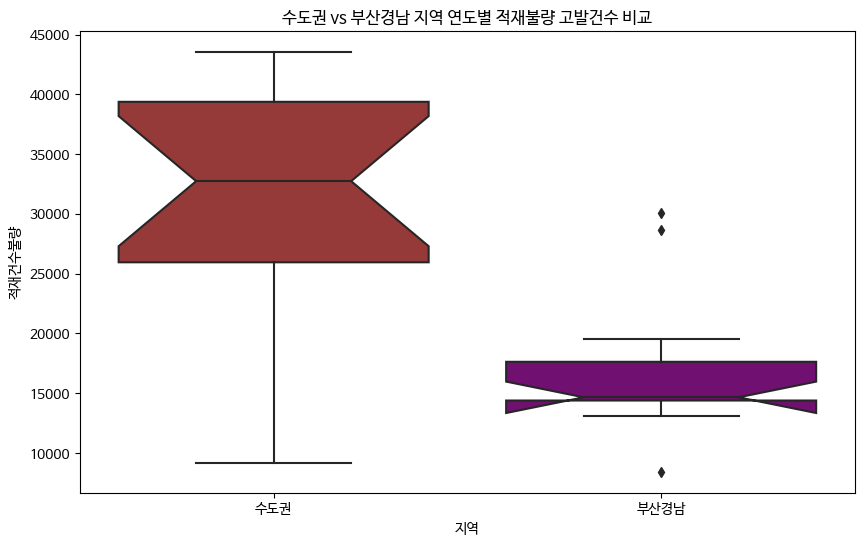

In [ ]:
#박스플롯으로 비교
from scipy.stats import ttest_ind
capital_data = df1[df1['구분'] == '수도권']
busan_gyeongnam_data = df1[df1['구분'] == '부산경남']

years = [str(year) for year in range(2009, 2023)]
yearly_data_capital = capital_data.loc[:, '2009':'2023-05']
yearly_data_busan_gyeongnam = busan_gyeongnam_data.loc[:, '2009':'2023-05']

plt.figure(figsize=(10, 6))
sns.boxplot(data=[yearly_data_capital.sum(), yearly_data_busan_gyeongnam.sum()],
            palette=['brown', 'purple'], notch=True)
plt.xlabel('지역')
plt.ylabel('적재건수불량')
plt.title('수도권 vs 부산경남 지역 연도별 적재불량 고발건수 비교')
plt.xticks([0, 1], ['수도권', '부산경남'])

# "귀무가설: 수도권과 부산경남 지역 간의 연도별 평균 적재불량건수에는 차이가 없다."
# "대립가설: 수도권과 부산경남 지역 간의 연도별 평균 적재불량건수에는 차이가 있다."

#t-검정
t_stat, p_value = ttest_ind(yearly_data_capital.sum(), yearly_data_busan_gyeongnam.sum())
print(f'T-statistic: {t_stat}\nP-value: {p_value}')
# "P-value가 유의수준 0.05보다 작으므로 귀무가설을 기각하고, 대립가설을 채택
#"수도권과 부산경남 지역 간의 연도별 평균 적재불량건수에는 통계적으로 유의미한 차이가 있다"
plt.show()


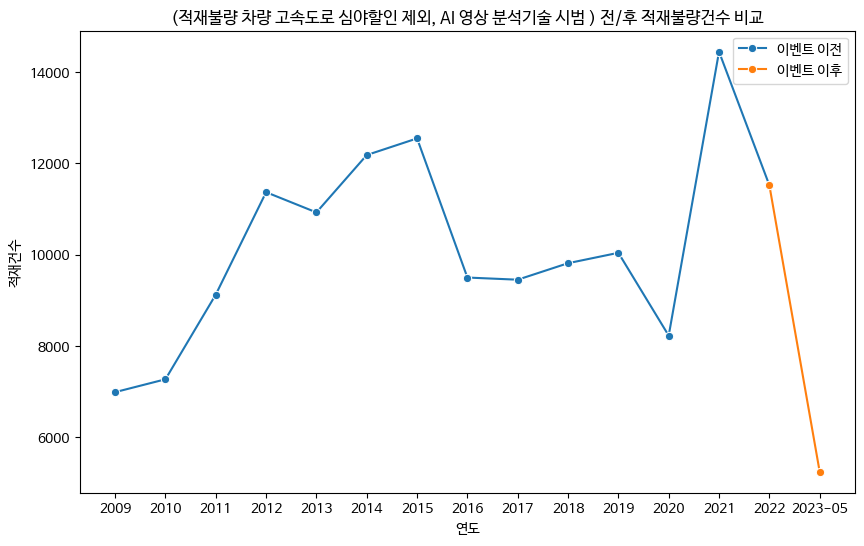

In [ ]:
#적재불량 단속된 차량 고속도로 심야할인 제외
#AI 영상 분석기술 시범
event_start_date = '2022'
event_end_date = '2023-05'

before_event_data = df1.loc[:, '2009':event_start_date]

after_event_data = df1.loc[:, event_start_date:event_end_date]

plt.figure(figsize=(10, 6))
sns.lineplot(data=before_event_data.mean(), label='이벤트 이전', marker='o')
sns.lineplot(data=after_event_data.mean(), label='이벤트 이후', marker='o')
plt.xlabel('연도')
plt.ylabel('적재건수')
plt.title('(적재불량 차량 고속도로 심야할인 제외, AI 영상 분석기술 시범 ) 전/후 적재불량건수 비교')
plt.legend()

plt.show()


2023년의 예측값: 35189.7472527473


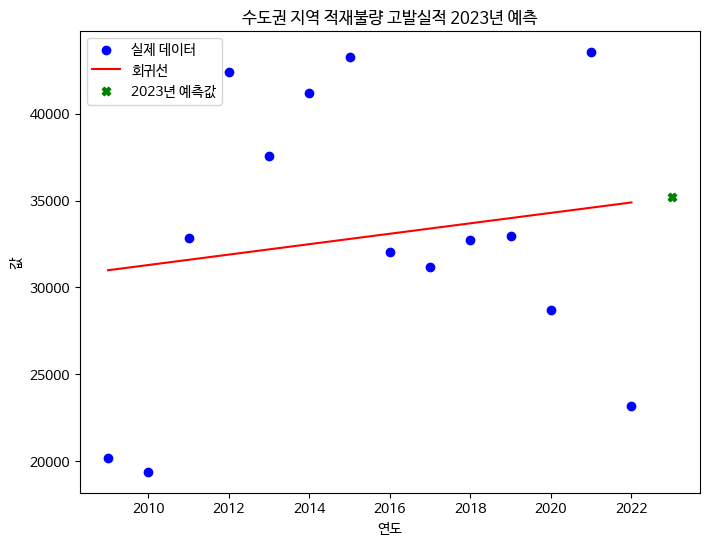

In [ ]:
#선형회귀분석으로 2023년의 적재불량 고발실적 예상
from sklearn.linear_model import LinearRegression

capital_data = df1[df1['구분'] == '수도권']
yearly_data_capital = capital_data.loc[:, '2009':'2022']


X_capital = yearly_data_capital.columns.astype(int).values.reshape(-1, 1)
y_capital = yearly_data_capital.values.flatten()
model_capital = LinearRegression()
model_capital.fit(X_capital, y_capital)

next_year_capital = 2023
predicted_value_capital = model_capital.predict([[next_year_capital]])

plt.figure(figsize=(8, 6))
plt.scatter(X_capital, y_capital, label='실제 데이터', color='blue')
plt.plot(X_capital, model_capital.predict(X_capital), label='회귀선', color='red')
plt.scatter(next_year_capital, predicted_value_capital, color='green', marker='X', label=f'{next_year_capital}년 예측값')

print(f'2023년의 예측값: {predicted_value_capital[0]}')

plt.title('수도권 지역 적재불량 고발실적 2023년 예측')
plt.xlabel('연도')
plt.ylabel('값')
plt.legend()
plt.show()


In [ ]:
#주요해외국가의 과적단속 과태료
#대만은 제한없음 (초과중량 비례)
#국토교통부가가 2021년 시행한 국토교통연구기획사업의 결과에 따르면 우리나라의 처벌수위는 낮은 편이다.
#우리나라의 과적 과태료는 최대 300만원인데 반해 미국은 1785만원, 영국은 720만원의 과태료를 물리고 있다.
#과적 과태료가 적은것이 화물차 운전자들이 적재불량을 의식하지 않는것에 원인일 수도 있다.
national_penalty = pd.DataFrame({'국가':["대한민국", "일본", "미국", "영국"],
                             '최대 과적 과태료':[3000000, 3000000, 17850000, 7200000]})


national_penalty

,국가,최대 과적 과태료
0,대한민국,3000000
1,일본,3000000
2,미국,17850000
3,영국,7200000


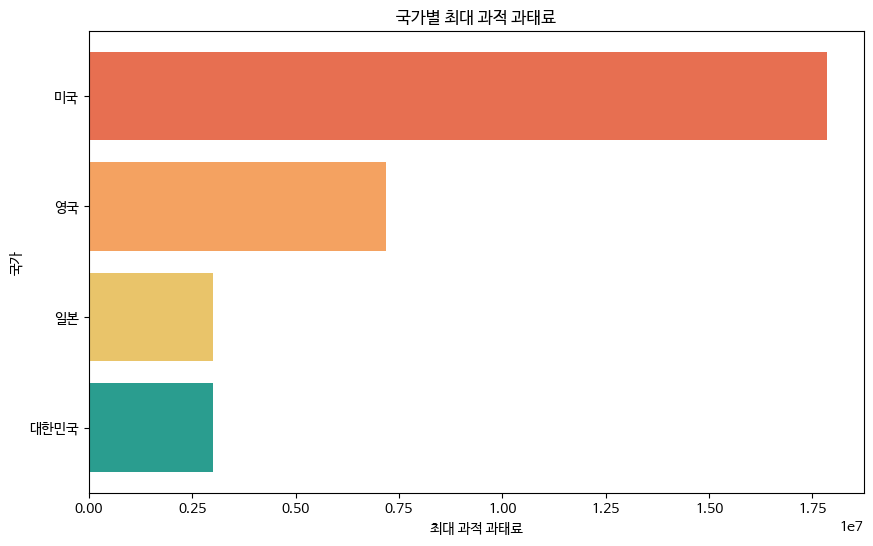

In [ ]:
#국가별 최대 과적 과태료를 수평막대그래프로 시각화
plt.figure(figsize=(10, 6))
national_penalty = national_penalty.sort_values(by=['최대 과적 과태료'], ascending=True)
plt.barh(national_penalty['국가'], national_penalty['최대 과적 과태료'] ,color=['#2a9d8f', '#e9c46a', '#f4a261', '#e76f51'])

plt.xlabel('최대 과적 과태료')
plt.ylabel('국가')
plt.title('국가별 최대 과적 과태료')
plt.show()

In [ ]:
#한국도로공사가 발표한 ‘2018~2022, 고속도로 낙하물 사고'
accident_data = pd.DataFrame({'연도':["2018", "2019", "2020", "2021" , "2022"],
                             '낙하물 사고 수':[54,58,56,46,57]})
average_accident_data = round(accident_data['낙하물 사고 수'].mean())
print('낙하물 사고 평균',average_accident_data)
accident_data

낙하물 사고 평균 54


,연도,낙하물 사고 수
0,2018,54
1,2019,58
2,2020,56
3,2021,46
4,2022,57


In [ ]:
#한국도로공사가 발표한 ‘2018~2022, 고속도로 낙하물 수거 건수'
pick_up = pd.DataFrame({'연도':["2018", "2019", "2020", "2021" , "2022"],
                             '수거 건수':[256716,251548,232521,197918,198950]})

average_pick_up = round(pick_up['수거 건수'].mean())
print('수거 건수의 평균: ',average_pick_up)
pick_up

수거 건수의 평균:  227531


,연도,수거 건수
0,2018,256716
1,2019,251548
2,2020,232521
3,2021,197918
4,2022,198950


In [ ]:
#한국도로공사는 2014년부터 ‘낙하물 신고 포상제’를 운영하고 있으나,
#연평균 약 227,531건(2018년~2022년 평균)의 낙하물이 수거된 것과 비교해, 지난 5년간 포상 건수는 7건(포상금 35만원)에 불과
#포상금 제도는 별로 효과가 있지않다.

reward = pd.DataFrame({'연도':["2018", "2019", "2020", "2021" , "2022"],
                             '포상 건수':[1,0,1,3,2],
                              "포상금": [50000, 0, 50000,150000, 100000]})
reward

,연도,포상 건수,포상금
0,2018,1,50000
1,2019,0,0
2,2020,1,50000
3,2021,3,150000
4,2022,2,100000


낙하물 사고 평균: 54
수거 건수의 평균: 227531


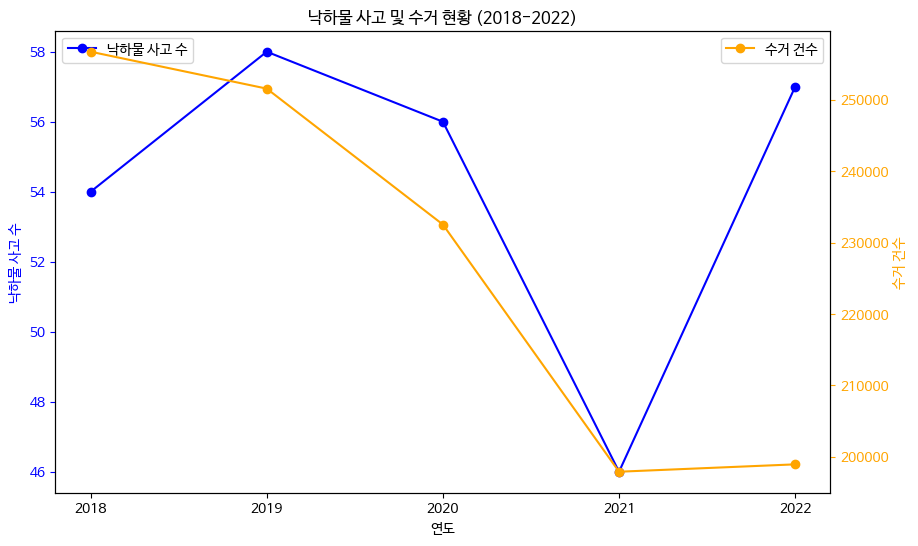

In [ ]:
# 2018~2022의 낙하물 사고와 수거 현황 그래프
print(f'낙하물 사고 평균: {average_accident_data}')
print(f'수거 건수의 평균: {average_pick_up}')

fig, ax1 = plt.subplots(figsize=(10, 6))

# 낙하물 사고 수 (왼쪽 y축)
ax1.plot(accident_data['연도'], accident_data['낙하물 사고 수'], marker='o', label='낙하물 사고 수', color='blue')
ax1.set_xlabel('연도')
ax1.set_ylabel('낙하물 사고 수', color='blue')
ax1.tick_params('y', colors='blue')
ax1.legend(loc='upper left')

# 수거 건수  (오른쪽 y축)
ax2 = ax1.twinx()
ax2.plot(pick_up['연도'], pick_up['수거 건수'], marker='o', label='수거 건수', color='orange')
ax2.set_ylabel('수거 건수', color='orange')
ax2.tick_params('y', colors='orange')
ax2.legend(loc='upper right')

plt.title('낙하물 사고 및 수거 현황 (2018-2022)')

plt.show()


In [ ]:
#현재 차량의 적재불량은 경찰청 고속도로순찰대와 한국도로공사 직원이 적발하고있다.(AI 영상 분석기술 시행중인 곳은 AI가 발견 후 직원이 단속)
cmp_data = pd.DataFrame({
    '연도': ["2018", "2019", "2020", "2021", "2022"],
    '고속도로순찰대': [1876, 1819, 3024, 3073, 2136],
    '한국도로공사': [78532, 80352, 65795, 115576, 92196]
})

cmp_data

,연도,고속도로순찰대,한국도로공사
0,2018,1876,78532
1,2019,1819,80352
2,2020,3024,65795
3,2021,3073,115576
4,2022,2136,92196


각 기관의 평균 단속실적 :  86490 2386
각 기관의 총 단속실적 :  432451 11928
총 적발실적 :  444379
한국도로공사의 비율 :  97 %


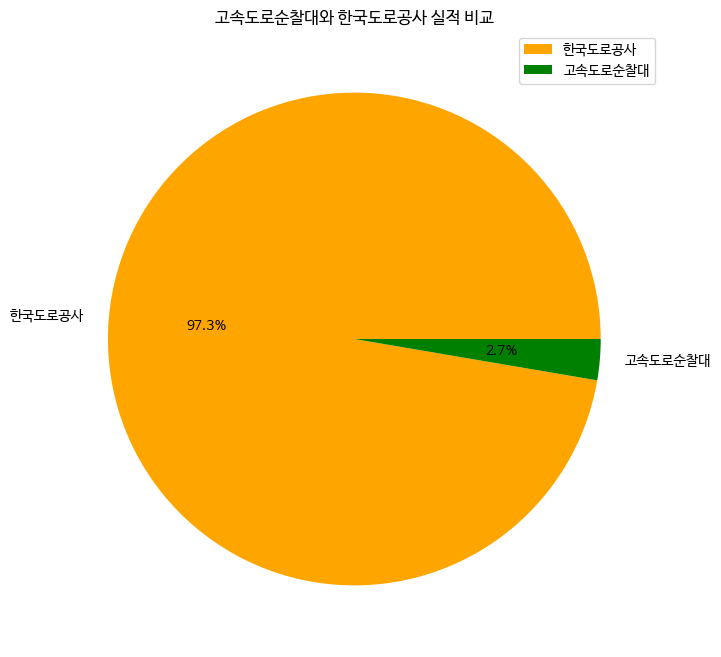

In [ ]:
#적재불량 단속을 하는 비중을 파이 차트로 시각화
average_cmp_data1 = round(cmp_data['한국도로공사'].mean())
average_cmp_data2 = round(cmp_data['고속도로순찰대'].mean())
sum_cmp_data1 = round(cmp_data['한국도로공사'].sum())
sum_cmp_data2 = round(cmp_data['고속도로순찰대'].sum())
total_sum = sum_cmp_data1 + sum_cmp_data2


print("각 기관의 평균 단속실적 : ", average_cmp_data1, average_cmp_data2)
print("각 기관의 총 단속실적 : ", sum_cmp_data1, sum_cmp_data2)
print("총 적발실적 : ", total_sum)
print("한국도로공사의 비율 : ", round((sum_cmp_data1 / total_sum * 100.0)), "%")

plt.figure(figsize=(8, 8))
plt.pie([average_cmp_data1, average_cmp_data2], labels=['한국도로공사', '고속도로순찰대'],autopct='%.1f%%', colors=['orange', 'green'])
plt.title('고속도로순찰대와 한국도로공사 실적 비교')
plt.legend()
plt.show()


In [ ]:
# 한국도로공사에서 제공한 (낙하물 사고 수, 수거 건수, 포상 건수, 포상금, 적재불량 단속 기관)데이터를 연도로 묶어서 하나의 데이터프레임으로 만들기
merged_df = pd.merge(accident_data, pick_up, on='연도')
merged_df = pd.merge(merged_df, reward, on='연도')
merged_df = pd.merge(merged_df, cmp_data, on='연도')

merged_df

,연도,낙하물 사고 수,수거 건수,포상 건수,포상금,고속도로순찰대,한국도로공사
0,2018,54,256716,1,50000,1876,78532
1,2019,58,251548,0,0,1819,80352
2,2020,56,232521,1,50000,3024,65795
3,2021,46,197918,3,150000,3073,115576
4,2022,57,198950,2,100000,2136,92196


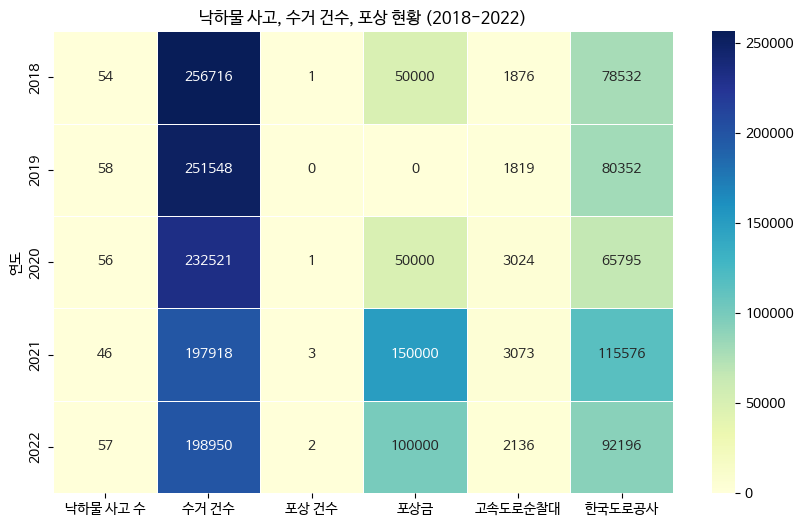

In [ ]:
#merged_df 데이터를 히트맵으로 시각화
plt.figure(figsize=(10, 6))
sns.heatmap(merged_df.set_index('연도'), annot=True, cmap='YlGnBu', fmt='g', linewidths=.5)
plt.title('낙하물 사고, 수거 건수, 포상 현황 (2018-2022)')
plt.show()


In [ ]:
#결론
#적재불량 사고는 피해차량이 대처하기 어렵고 대형사고로 이어질 가능성이 매우 크기 때문에 경각심이 필요하다.
#그런 적재불량 사고가 매년 50건씩 발생하고 있다. (낙하 사고로 최근 5년 동안 3명이 숨지고 21명이 부상)
#그러나 포상금 제도는 제대로 효과를 보지 못하고 있고 다른 주요 국가들에 비해 대한민국의 적재불량 과태료는 적은 편이다.
#적재불량 사고의 해결책으로 2022년 1월부터 적재불량 단속차량에 고속도로 심야할인 제외를 적용하는 법률이 적용되어 긍정적인 효과를 본 것이 확인되었다.
#그리고 AI분야가 적재불량 단속에도 관여하게 되었는데 이것이 큰 행정력감소와 효율성 증가를 일으킬 것으로 보인다. AI 단속은 2024년부터 전국적으로 확대될 예정이다.
#하지만 실질적으로 가장 많이 적재불량을 단속하는 한국도로공사는 'AI 영상 분석기술'을 통해 적발한 적재 불량 화물차주에게 심할 경우에만 공익신고 방식을 활용하고 경미한 경우에는 계도만 한다.
#한국도로공사는 경찰과 달리 단속 권한이 없어 신고 후 경찰이 출동할 때 까지의 시간이 소요되어 즉각적인 대응이 어려운 상황이라는 비판이 나오고 있다.